In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from multiviewica_delay.multiviewica_dilations_shifts._plot_functions import plot_sources_3d

In [36]:
# parameters
task = "auditory"
n_subjects = 100
n_components = 5
n_concat = 2
max_dilation = 1.15
max_shift = 0.05

In [3]:
# load results
results_dir = "/storage/store2/work/aheurteb/mvicad/tbme/results/results_camcan/mvicad2/clean_subjects/"
suffix = f"_{task}_task_{n_subjects}_{n_components}_{n_concat}.npy"
W_list = np.load(results_dir + "W" + suffix)
dilations = np.load(results_dir + "dilations" + suffix)
shifts = np.load(results_dir + "shifts" + suffix)
Y_list = np.load(results_dir + "Y" + suffix)
ages = np.load(results_dir + "ages" + suffix)

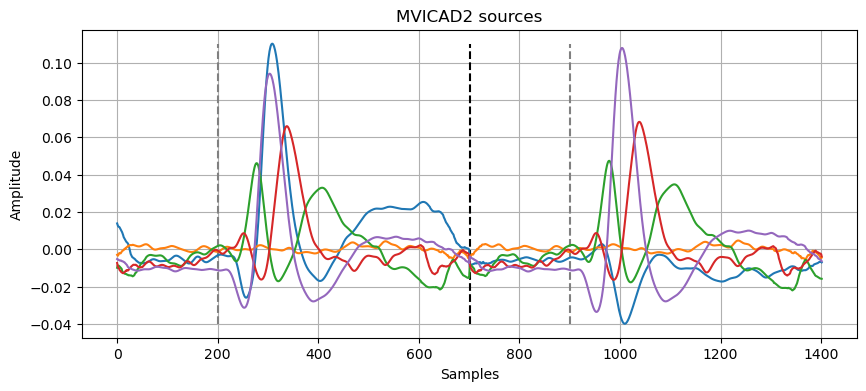

In [4]:
# plot the average sources
Y_avg = np.mean(Y_list, axis=0)
if n_concat == 1:
    plt.plot(np.linspace(-0.2, 0.5, 701), Y_avg.T)
    plt.vlines(
        x=0, ymin=np.min(Y_avg), ymax=np.max(Y_avg), colors="grey",
        linestyles="--")
    plt.xlabel("Time (s)")
else:
    plt.figure(figsize=(10, 4))
    plt.plot(Y_avg.T)
    for i in range(n_concat):
        plt.vlines(
            x=200+i*701, ymin=np.min(Y_avg), ymax=np.max(Y_avg), colors="grey",
            linestyles="--")
        if i > 0:
            plt.vlines(
                x=i*701, ymin=np.min(Y_avg), ymax=np.max(Y_avg), colors="black",
                linestyles="--")
    plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("MVICAD2 sources")
plt.grid()
plt.show()

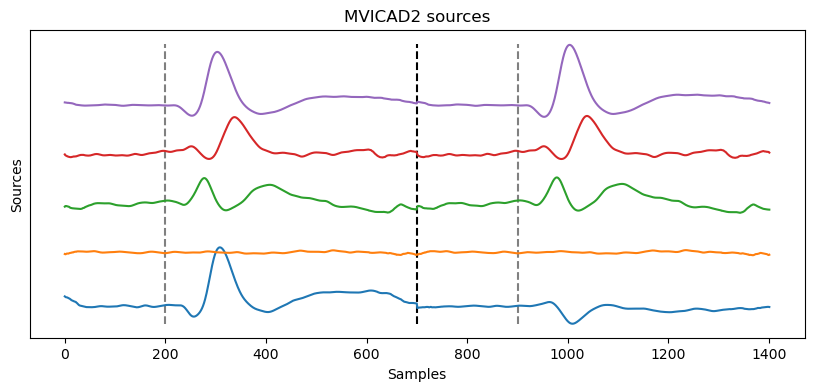

In [5]:
# sources one by one
height = 0.1
if n_concat == 1:
    for i in range(n_components):
        plt.plot(np.linspace(-0.2, 0.5, 701), Y_avg[i] + i * height)
    plt.vlines(
        x=0, ymin=np.min(Y_avg), ymax=height*(n_components-1)+np.max(Y_avg),
        colors="grey", linestyles="--")
    plt.xlabel("Time (s)")
else:
    plt.figure(figsize=(10, 4))
    for i in range(n_components):
        plt.plot(Y_avg[i] + i * height)
    for i in range(n_concat):
        plt.vlines(
            x=200+i*701, ymin=np.min(Y_avg), ymax=height*(n_components-1)+np.max(Y_avg),
            colors="grey", linestyles="--")
        if i > 0:
            plt.vlines(
                x=i*701, ymin=np.min(Y_avg), ymax=height*(n_components-1)+np.max(Y_avg),
                colors="black", linestyles="--")
    plt.xlabel("Samples")
plt.yticks([])
plt.ylabel("Sources")
plt.title("MVICAD2 sources")
plt.show()

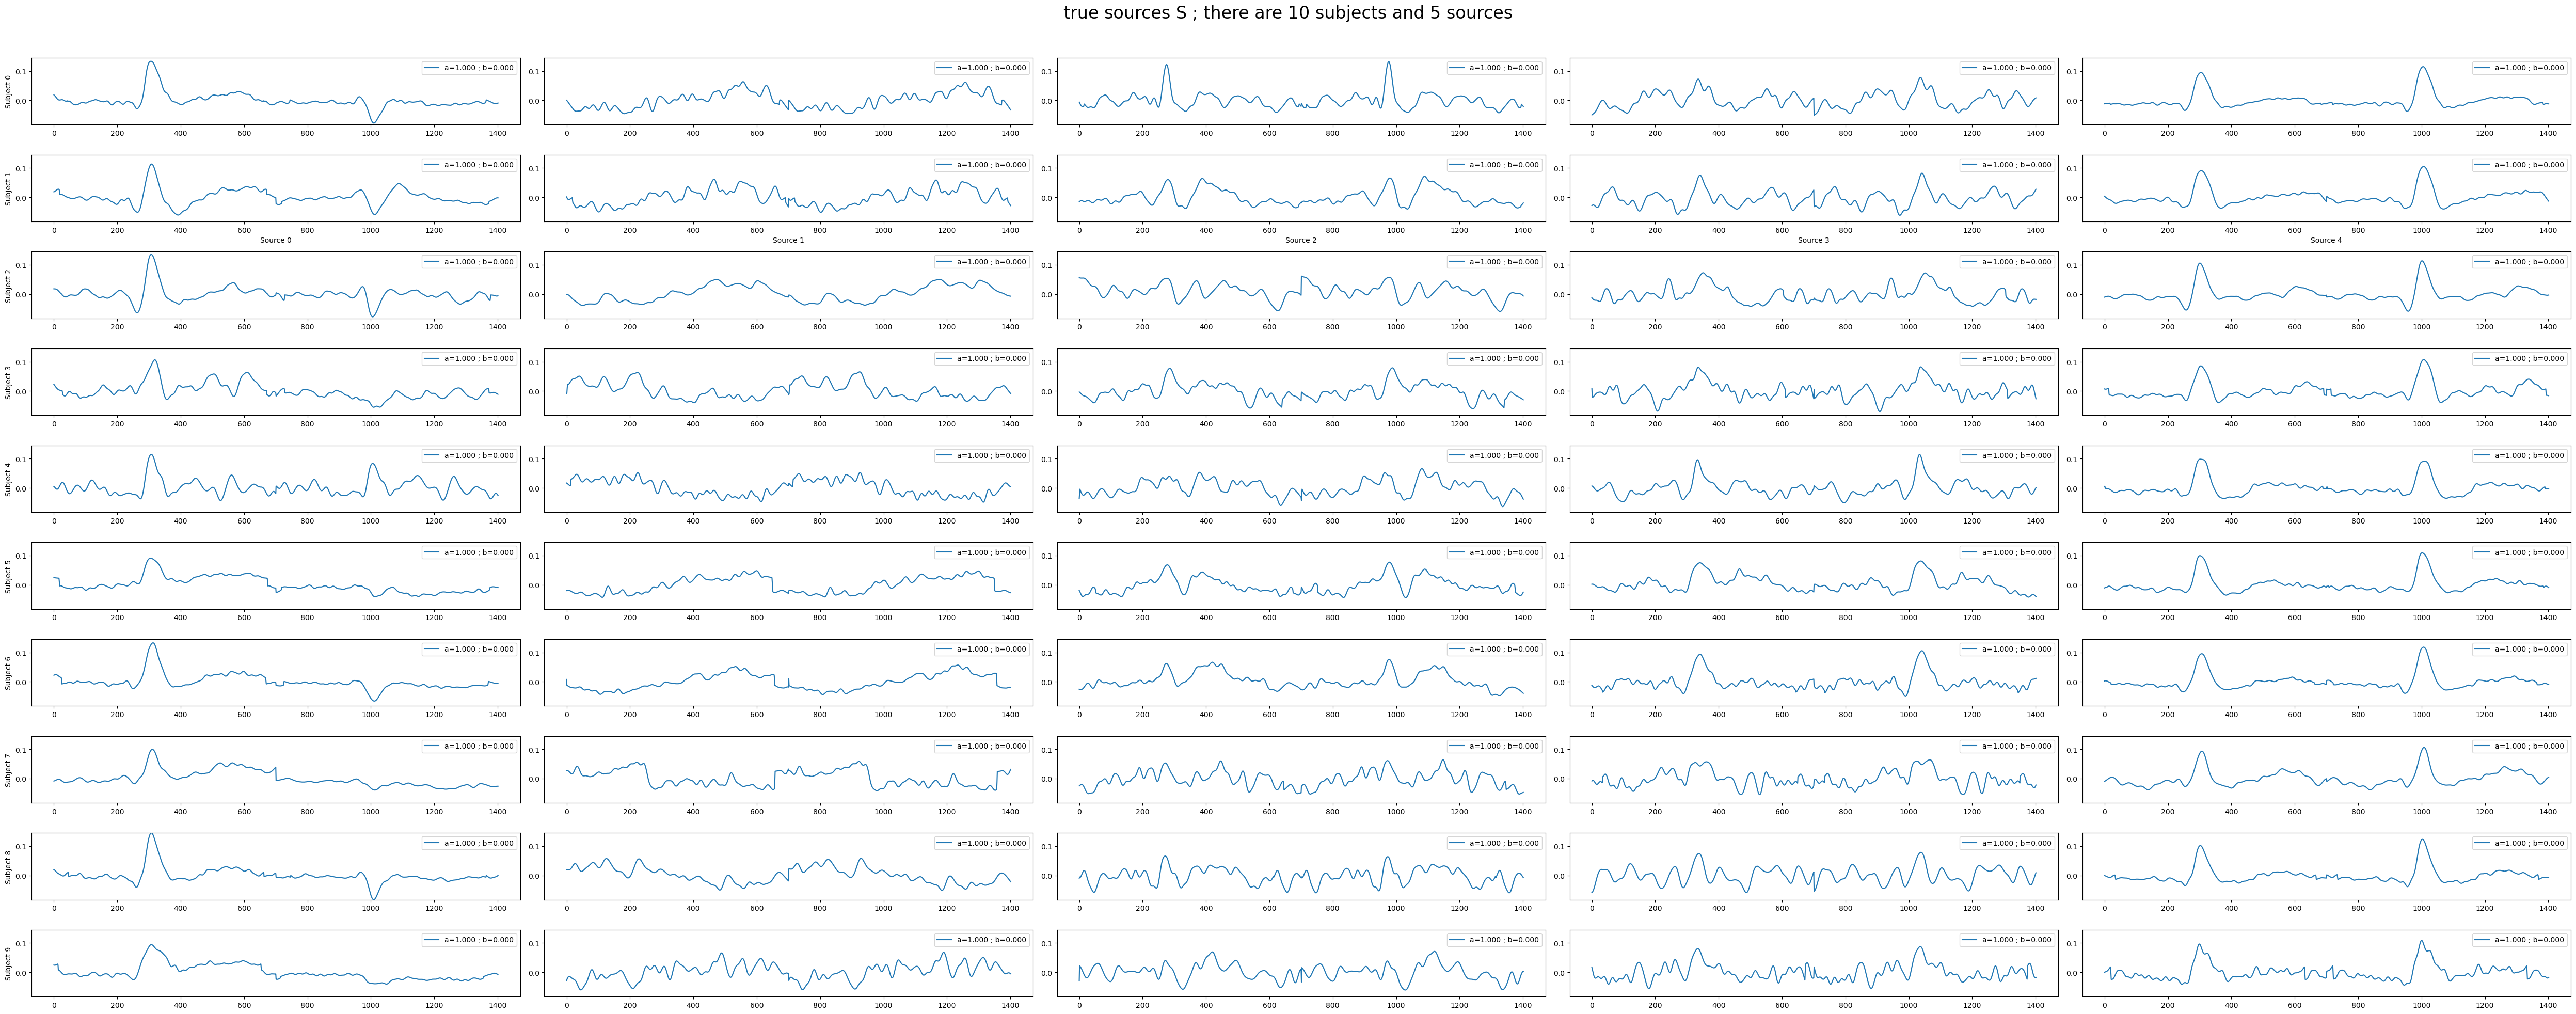

In [6]:
# plot individual sources for the (at most) first 10 subjects
plot_sources_3d(Y_list[:10]);

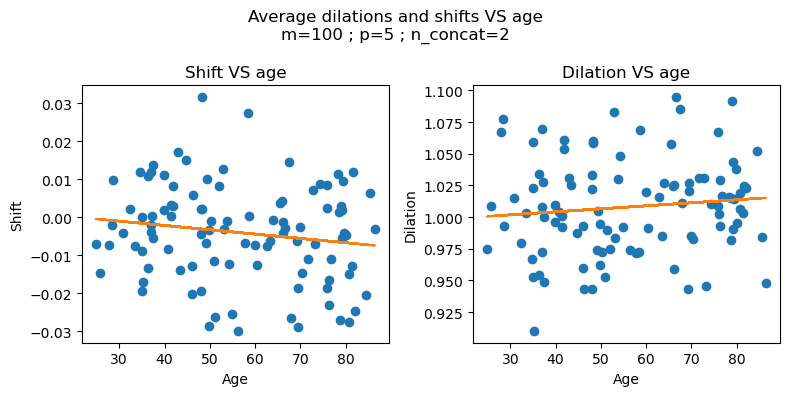

In [7]:
# average dilations and shifts
dilations_avg = np.mean(dilations, axis=1)
shifts_avg = np.mean(shifts, axis=1)

# Linear regression
slope_dilations, intercept_dilations, _, _, _ = stats.linregress(ages, dilations_avg)
fitLine_dilations = slope_dilations * ages + intercept_dilations
slope_shifts, intercept_shifts, _, _, _ = stats.linregress(ages, -shifts_avg)
fitLine_shifts = slope_shifts * ages + intercept_shifts

# color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# average scatter plot
plt.subplots(1, 2, figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(ages, -shifts_avg)
plt.plot(ages, fitLine_shifts, c=colors[1])
plt.xlabel("Age (years)")
plt.ylabel("Shift")
plt.title("Shift VS age")
plt.subplot(1, 2, 2)
plt.scatter(ages, dilations_avg)
plt.plot(ages, fitLine_dilations, c=colors[1])
plt.xlabel("Age (years)")
plt.ylabel("Dilation")
plt.title("Dilation VS age")
plt.suptitle(
    f"Average dilations and shifts VS age\nm={n_subjects} ; p={n_components} ; n_concat={n_concat}")
plt.tight_layout()
plt.show()

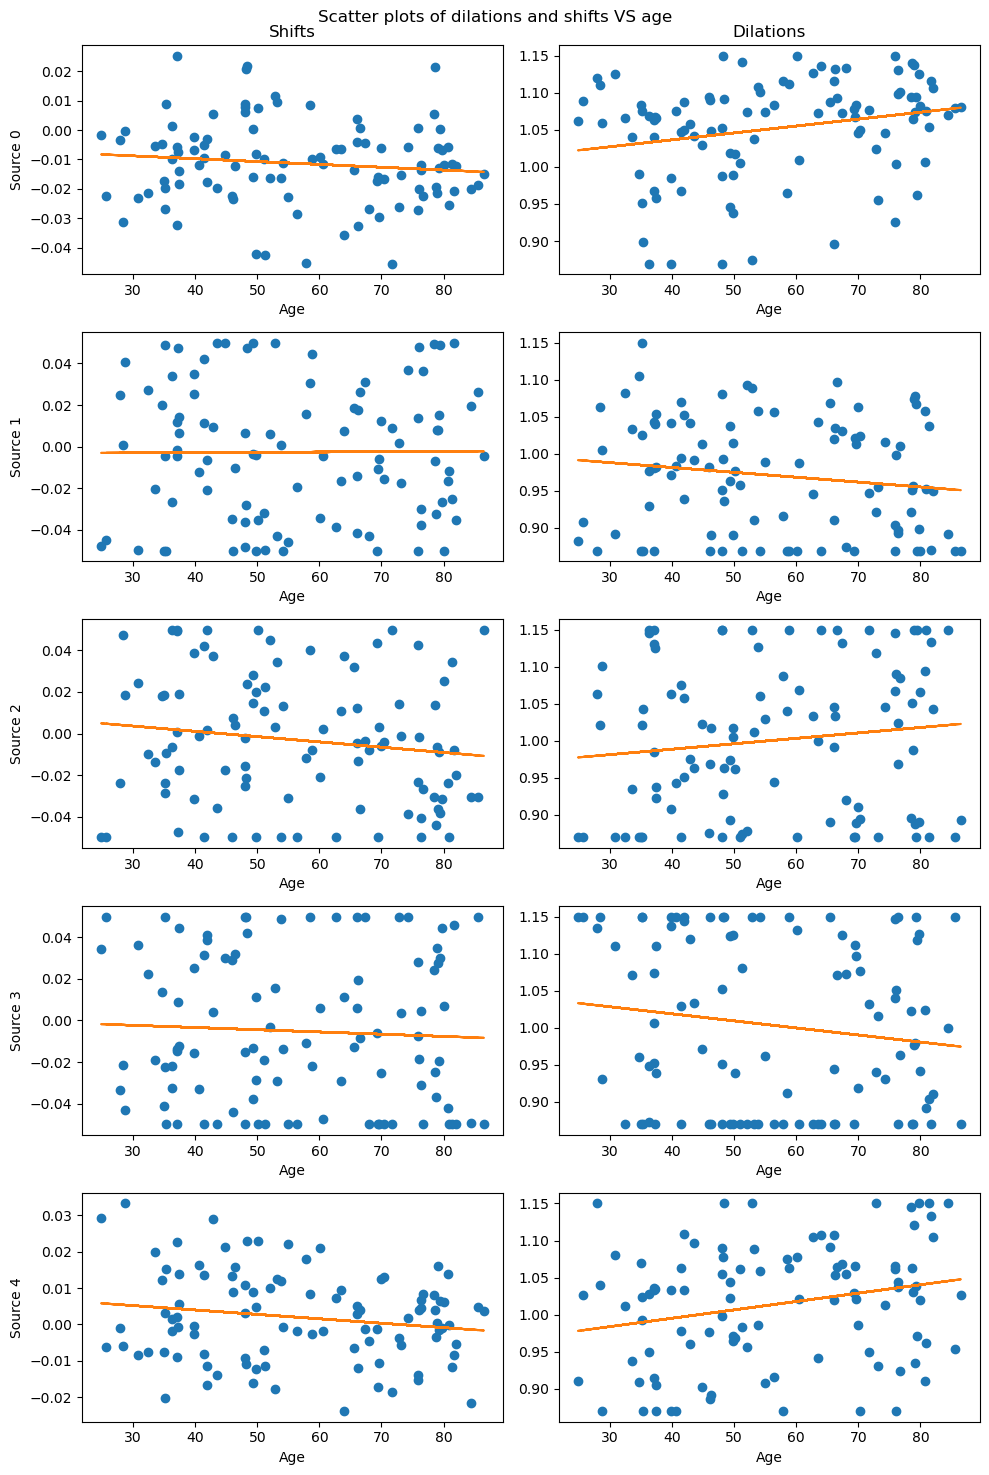

In [8]:
# scatter plots
fig, axes = plt.subplots(n_components, 2, figsize=(10, 3*n_components))
for i in range(n_components):
    ax = axes[i, 0]
    ax.scatter(ages, -shifts[:, i])
    if i == 0:
        ax.set_title("Shifts")
    ax.set_xlabel("Age (years)")
    ax.set_ylabel(f"Source {i}")
    slope, intercept, _, _, _ = stats.linregress(ages, -shifts[:, i])
    fitLine = slope * ages + intercept
    ax.plot(ages, fitLine, c=colors[1])

    ax = axes[i, 1]
    ax.scatter(ages, dilations[:, i])
    if i == 0:
        ax.set_title("Dilations")
    ax.set_xlabel("Age (years)")
    slope, intercept, _, _, _ = stats.linregress(ages, dilations[:, i])
    fitLine = slope * ages + intercept
    ax.plot(ages, fitLine, c=colors[1])

plt.suptitle("Scatter plots of dilations and shifts VS age")
plt.tight_layout()

- Note that we plot dilations instead of 1/dilations. However, we plot -shifts.

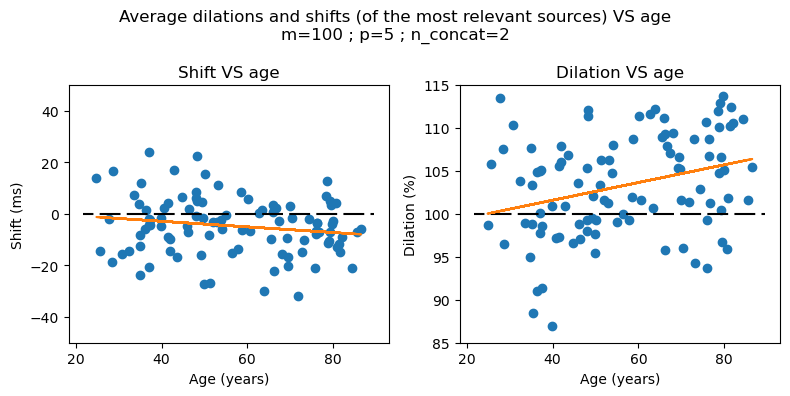

In [50]:
# average over the most "peak-shaped" sources
keep_sources = [0, 4]
dilations_avg_2 = np.mean(dilations[:, keep_sources], axis=1)
shifts_avg_2 = np.mean(shifts[:, keep_sources], axis=1)

# change units
factor_dilations = 1e2
factor_shifts = 1e3
dilations_avg_2 *= factor_dilations
shifts_avg_2 *= factor_shifts

# Linear regression
slope_dilations_2, intercept_dilations_2, _, _, _ = stats.linregress(ages, dilations_avg_2)
fitLine_dilations_2 = slope_dilations_2 * ages + intercept_dilations_2
slope_shifts_2, intercept_shifts_2, _, _, _ = stats.linregress(ages, -shifts_avg_2)
fitLine_shifts_2 = slope_shifts_2 * ages + intercept_shifts_2

# average scatter plot over most relevant sources
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].scatter(ages, -shifts_avg_2)
axes[0].plot(ages, fitLine_shifts_2, c=colors[1])
xmin, xmax = axes[0].get_xlim()
axes[0].hlines(y=0, xmin=xmin, xmax=xmax, linestyles=(5, (10, 3)), colors="black")
axes[0].set_ylim([-max_shift*factor_shifts, max_shift*factor_shifts])
axes[0].set_xlabel("Age (years)")
axes[0].set_ylabel("Shift (ms)")
axes[0].set_title("Shift VS age")

axes[1].scatter(ages, dilations_avg_2)
axes[1].plot(ages, fitLine_dilations_2, c=colors[1])
xmin, xmax = axes[1].get_xlim()
axes[1].hlines(y=factor_dilations, xmin=xmin, xmax=xmax, linestyles=(5, (10, 3)), colors="black")
axes[1].set_ylim([(2-max_dilation)*factor_dilations, max_dilation*factor_dilations])
axes[1].set_xlabel("Age (years)")
axes[1].set_ylabel("Dilation (%)")
axes[1].set_title("Dilation VS age")
plt.suptitle(
    f"Average dilations and shifts (of the most relevant sources) VS age\nm={n_subjects} ; p={n_components} ; n_concat={n_concat}")
plt.tight_layout()
plt.show()